<a href="https://colab.research.google.com/github/ShreyashFtw/RohitSharmaodi2007-2019/blob/main/RohitSharmaodi2007_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('/content/rohitsharmaodi.xlsx')
df


,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,6471,DNB,-,-,-,-,-,v Ireland,Belfast,2007-06-23,ODI # 2590,Rohit Sharma,34102
1,6472,8,8,9,88.88,0,0,v South Africa,Belfast,2007-06-26,ODI # 2592,Rohit Sharma,34102
2,6473,1,1,4,25,0,0,v Australia,Hyderabad (Deccan),2007-10-05,ODI # 2625,Rohit Sharma,34102
3,6474,52,52,61,85.24,3,1,v Pakistan,Jaipur,2007-11-18,ODI # 2647,Rohit Sharma,34102
4,6475,29,29,43,67.44,5,0,v Australia,Brisbane,2008-02-03,ODI # 2670,Rohit Sharma,34102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,6672,37,37,66,56.06,5,0,v Australia,Hyderabad (Deccan),2019-03-02,ODI # 4102,Rohit Sharma,34102
202,6673,0,0,6,0,0,0,v Australia,Nagpur,2019-03-05,ODI # 4106,Rohit Sharma,34102
203,6674,14,14,14,100,2,1,v Australia,Ranchi,2019-03-08,ODI # 4109,Rohit Sharma,34102
204,6675,95,95,92,103.26,7,2,v Australia,Mohali,2019-03-10,ODI # 4111,Rohit Sharma,34102


In [3]:
# Check for missing values
print(df.isnull().sum())

# Convert 'Start Date' to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['Year'] = df['Start Date'].dt.year

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64


In [4]:
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')


In [5]:
runs_by_opponent = df.groupby('Opposition')['Runs'].sum().sort_values(ascending=False)
runs_by_opponent

Opposition
v Australia       1980.0
v Sri Lanka       1562.0
v West Indies     1219.0
v New Zealand      702.0
v South Africa     644.0
v Pakistan         580.0
v Bangladesh       556.0
v England          352.0
v Zimbabwe         242.0
v Ireland           64.0
v U.A.E.            57.0
v Hong Kong         34.0
v Afghanistan       18.0
Name: Runs, dtype: float64

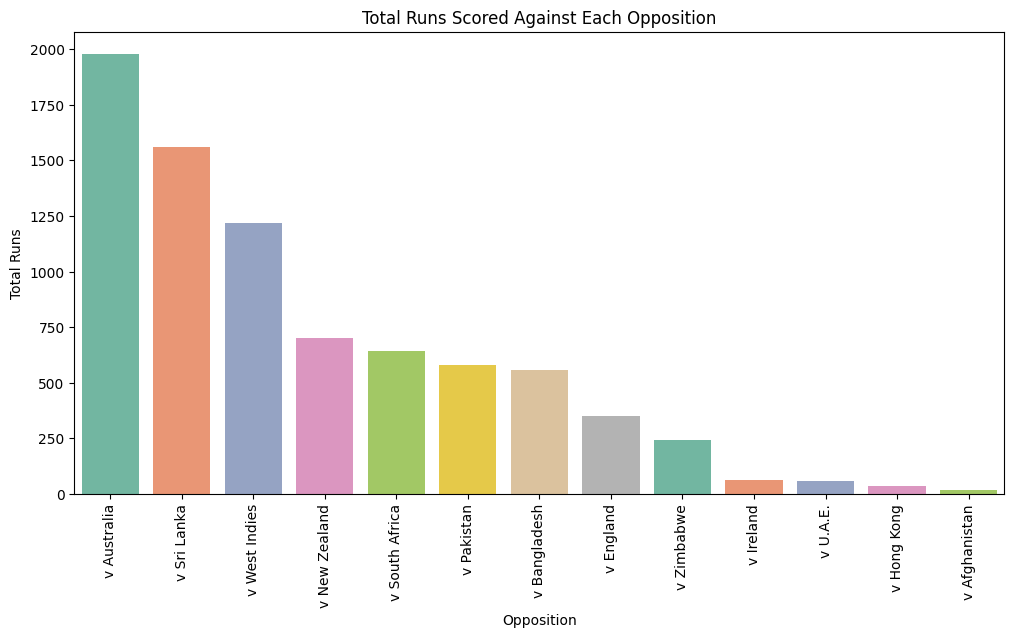

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x=runs_by_opponent.index, y=runs_by_opponent.values, palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Opposition')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored Against Each Opposition')
plt.show()


In [7]:
avg_by_opponent = df.groupby('Opposition')['Runs'].mean().sort_values(ascending=False)
print(avg_by_opponent)


Opposition
v Ireland         64.000000
v U.A.E.          57.000000
v Australia       55.000000
v West Indies     48.760000
v Bangladesh      46.333333
v Pakistan        38.666667
v Sri Lanka       35.500000
v Zimbabwe        34.571429
v New Zealand     33.428571
v England         29.333333
v South Africa    28.000000
v Afghanistan     18.000000
v Hong Kong       17.000000
Name: Runs, dtype: float64


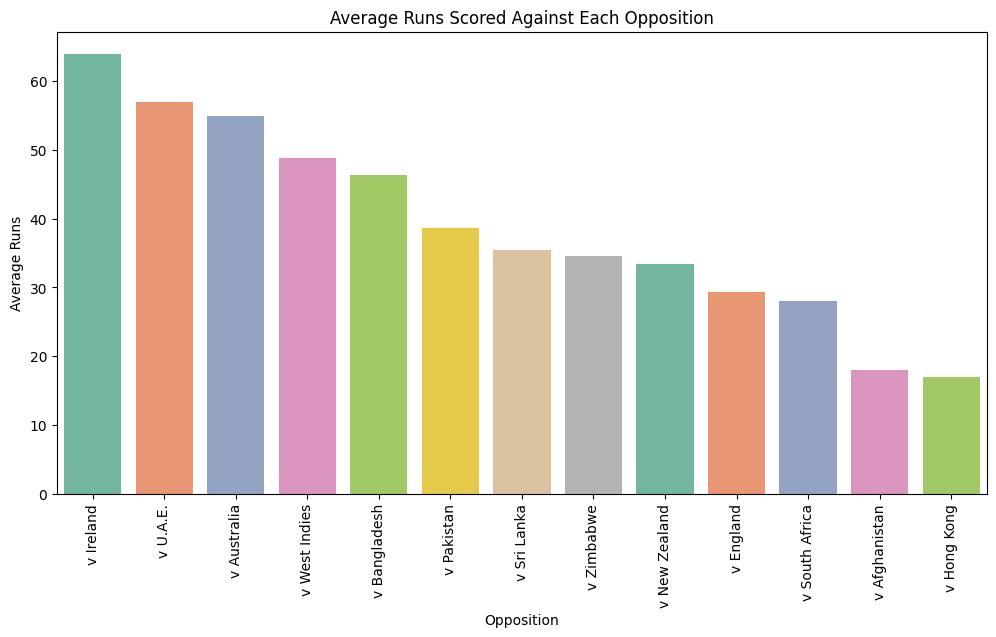

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_by_opponent.index, y=avg_by_opponent.values, palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Opposition')
plt.ylabel('Average Runs')
plt.title('Average Runs Scored Against Each Opposition')
plt.show()

In [9]:
df['SR'] = pd.to_numeric(df['SR'], errors='coerce')
sr_by_opponent = df.groupby('Opposition')['SR'].mean().sort_values(ascending=False)
sr_by_opponent

Opposition
v U.A.E.          103.630000
v Ireland          96.960000
v West Indies      80.005600
v Australia        76.900556
v Afghanistan      75.000000
v Bangladesh       71.580000
v Hong Kong        71.235000
v Pakistan         68.144000
v South Africa     64.310435
v Sri Lanka        63.654773
v New Zealand      63.173333
v England          62.963333
v Zimbabwe         60.861429
Name: SR, dtype: float64

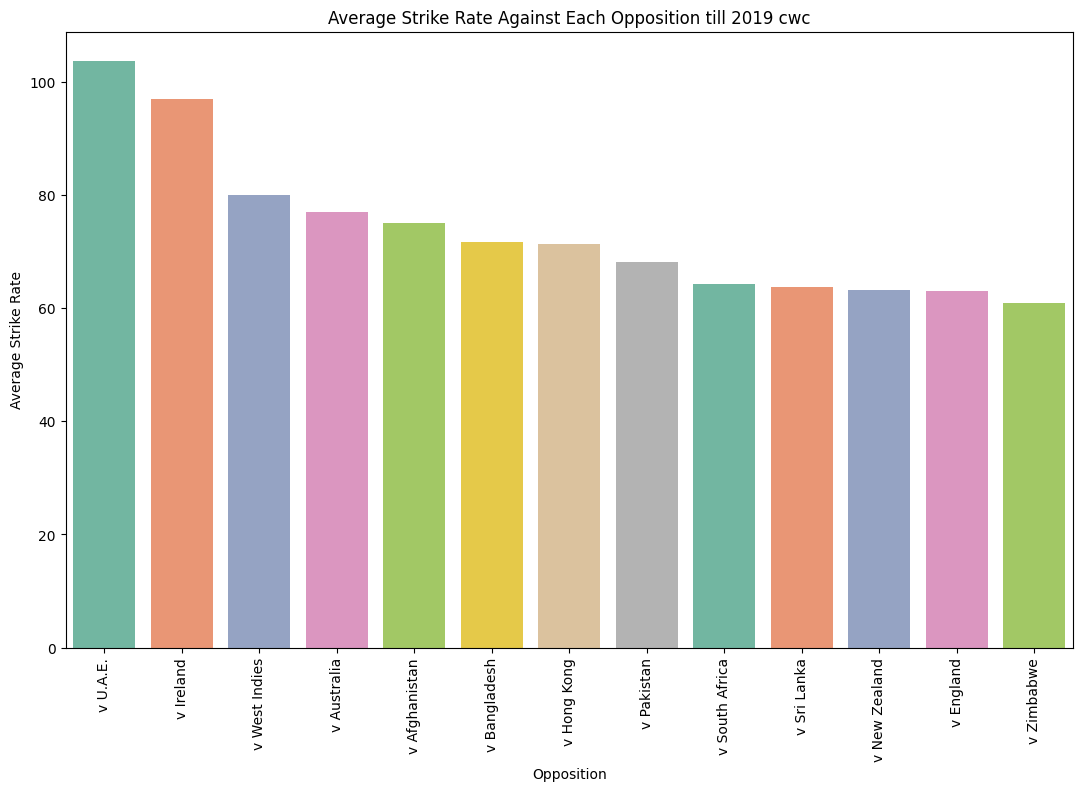

In [10]:
plt.figure(figsize=(13, 8))
sns.barplot(x=sr_by_opponent.index, y=sr_by_opponent.values, palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Opposition')
plt.ylabel('Average Strike Rate')
plt.title('Average Strike Rate Against Each Opposition till 2019 cwc')
plt.show()

<ipython-input-11-299a2f9d5ecd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_stats = df.groupby('Year')['Runs', 'SR'].agg(['mean']).reset_index()


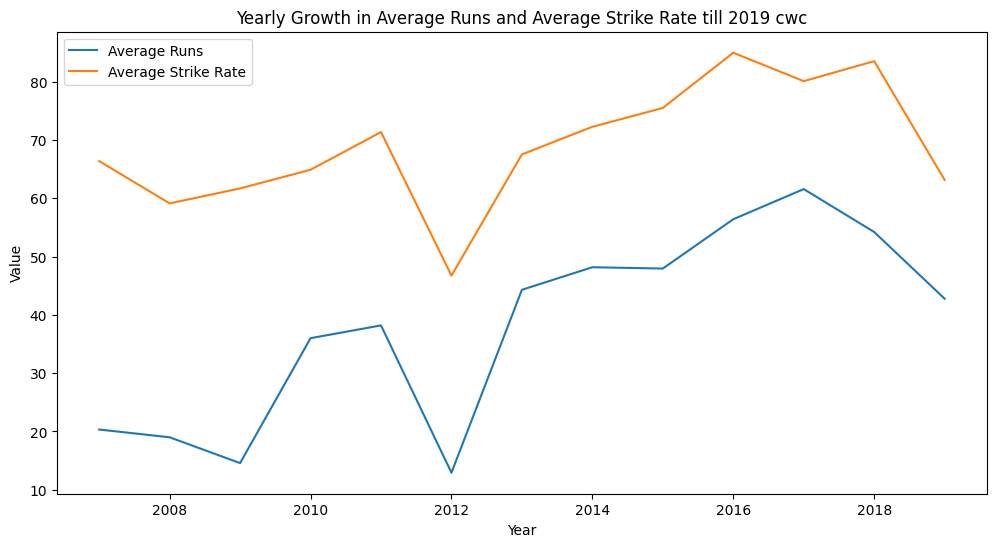

In [11]:
yearly_stats = df.groupby('Year')['Runs', 'SR'].agg(['mean']).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_stats, x='Year', y=('Runs', 'mean'), label='Average Runs')
sns.lineplot(data=yearly_stats, x='Year', y=('SR', 'mean'), label='Average Strike Rate')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Yearly Growth in Average Runs and Average Strike Rate till 2019 cwc')
plt.legend()
plt.show()


In [21]:
# Check the column names in your DataFrame
print(df.columns)

Index(['Unnamed: 0', 'Bat1', 'Runs', 'BF', 'SR', '4s', '6s', 'Opposition',
       'Ground', 'Start Date', 'Match_ID', 'Batsman', 'Player_ID', 'Year',
       'BoundaryRuns'],
      dtype='object')


In [22]:
# Check and clean the column names in your DataFrame
df.columns = df.columns.str.strip()

# Convert 'BoundaryRuns' and 'Runs' columns to numeric data types
df['BoundaryRuns'] = pd.to_numeric(df['BoundaryRuns'], errors='coerce')
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')

In [25]:
yearly_boundary_stats = df.groupby('Year').agg({'BoundaryRuns': 'sum', 'Runs': 'sum'})
yearly_boundary_stats['BoundaryPercentage'] = (yearly_boundary_stats['BoundaryRuns'] / yearly_boundary_stats['Runs']) * 100
yearly_boundary_stats


,BoundaryRuns,Runs,BoundaryPercentage
Year,,,
2007,4.0,61.0,6.557377
2008,46.0,532.0,8.646617
2009,6.0,102.0,5.882353
2010,41.0,504.0,8.134921
2011,49.0,611.0,8.019640
2012,14.0,168.0,8.333333
2013,149.0,1196.0,12.458194
2014,80.0,578.0,13.840830
2015,98.0,815.0,12.024540


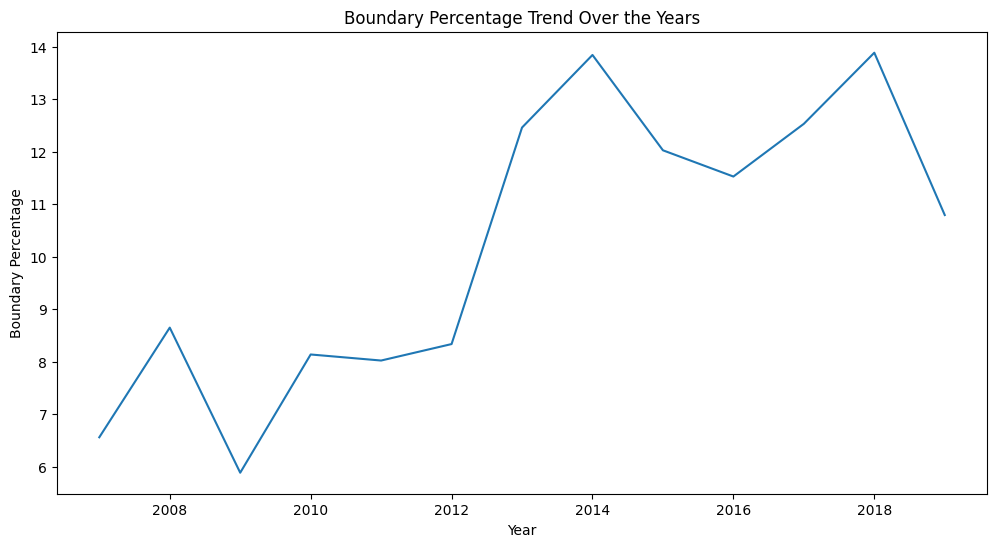

In [26]:
# Create a line plot for boundary percentage
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_boundary_stats, x='Year', y='BoundaryPercentage')
plt.xlabel('Year')
plt.ylabel('Boundary Percentage')
plt.title('Boundary Percentage Trend Over the Years')
plt.show()

In [34]:
# innings with 120 or more runs
min_runs = 120

# Filter innings that meet the criteria
impactful_innings = df[df['Runs'] >= min_runs]
impactful_innings

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,Year,BoundaryRuns,MatchOutcome
103,6574,141*,141.0,123,114.63,17,4,v Australia,Jaipur,2013-10-16,ODI # 3420,Rohit Sharma,34102,2013,21.0,Won
107,6578,209,209.0,158,132.27,12,16,v Australia,Bengaluru,2013-11-02,ODI # 3428,Rohit Sharma,34102,2013,28.0,Won
124,6595,264,264.0,173,152.60,33,9,v Sri Lanka,Kolkata,2014-11-13,ODI # 3544,Rohit Sharma,34102,2014,42.0,Won
126,6597,138,138.0,139,99.28,9,4,v Australia,Melbourne,2015-01-18,ODI # 3582,Rohit Sharma,34102,2015,13.0,Won
133,6604,137,137.0,126,108.73,14,3,v Bangladesh,Melbourne,2015-03-19,ODI # 3641,Rohit Sharma,34102,2015,17.0,Won
138,6609,150,150.0,133,112.78,13,6,v South Africa,Kanpur,2015-10-11,ODI # 3689,Rohit Sharma,34102,2015,19.0,Won
143,6614,171*,171.0,163,104.90,13,7,v Australia,Perth,2016-01-12,ODI # 3723,Rohit Sharma,34102,2016,20.0,Won
144,6615,124,124.0,127,97.63,11,3,v Australia,Brisbane,2016-01-15,ODI # 3724,Rohit Sharma,34102,2016,14.0,Won
156,6627,123*,123.0,129,95.34,15,1,v Bangladesh,Birmingham,2017-06-15,ODI # 3891,Rohit Sharma,34102,2017,16.0,Won
160,6631,124*,124.0,145,85.51,16,2,v Sri Lanka,Pallekele,2017-08-27,ODI # 3907,Rohit Sharma,34102,2017,18.0,Won


In [35]:
# Analyze the selected impactful innings
average_runs = impactful_innings['Runs'].mean()
strike_rate = impactful_innings['SR'].mean()
total_boundaries = impactful_innings['4s'].sum() + impactful_innings['6s'].sum()

# Print the analysis results
print(f"Average Runs in Impactful Innings: {average_runs:.2f}")
print(f"Average Strike Rate in Impactful Innings: {strike_rate:.2f}")
print(f"Total Boundaries in Impactful Innings: {total_boundaries}")


Average Runs in Impactful Innings: 155.59
Average Strike Rate in Impactful Innings: 113.66
Total Boundaries in Impactful Innings: 351
